In [1]:
# Descargamos el dataset
!gdown --id 1u1MRRWnjoi3p5eWV6bOtJX4_bZ0DT4eu
!unzip balanced_dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: balanced_dataset_default/data/idctjG4MjJwEA_video.jpg  
  inflating: balanced_dataset_default/data/idCTJkXenJkCk_video.jpg  
  inflating: balanced_dataset_default/data/idcTKbRC050UA_video.jpg  
  inflating: balanced_dataset_default/data/idctl16uxL9nY_video.jpg  
  inflating: balanced_dataset_default/data/idCTmEDYd2C1w_video.jpg  
  inflating: balanced_dataset_default/data/idcTN5X6bV1J8_video.jpg  
  inflating: balanced_dataset_default/data/idcu0CtwVMKaY_video.jpg  
  inflating: balanced_dataset_default/data/idcu0DPPhRSI0_video.jpg  
  inflating: balanced_dataset_default/data/idcU0DS2m-Glg_video.jpg  
  inflating: balanced_dataset_default/data/idcU0E7eDWYMw_video.jpg  
  inflating: balanced_dataset_default/data/idCU0eC-bR1RU_video.jpg  
  inflating: balanced_dataset_default/data/idCU0ehzT9Bbg_video.jpg  
  inflating: balanced_dataset_default/data/idCu0EN1CpWzU_video.jpg  
  inflating: balanced_dataset_defaul

In [11]:
# Librerias utilizadas.
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from skimage import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input,MaxPooling2D, Dropout
import cv2
from tensorflow import keras

In [15]:
# Cargamos los datos del CSV
dataInfo = pd.read_csv("./balanced_dataset_medium/data_info.csv")

# Cargamos los grupos
groups = pickle.load(open("ARREGLOS_TOPIC_IDS.pickle", "rb"))

In [78]:
def get_frequencies(group, title):

  freqs = [[], [], [], []]

  for ID in group["ID"]:

    trueArr = []
    for _, vals in dataInfo["topicID"].items():
      if isinstance(vals, float):
        trueArr.append(False)
      else:
        trueArr.append(ID in vals)

    freqDict = dataInfo.loc[trueArr]["label"].value_counts().to_dict()

    for i in range(4):
      if i in freqDict:
        freqs[i].append(freqDict[i])
      else:
        freqs[i].append(0)
  plot_groups_by_id(group["name"], freqs, title)


def plot_groups_by_id(names, freq, title):
  x = np.arange(len(names))
  width = 0.15  # the width of the bars

  fig, ax = plt.subplots()
  fig.set_figheight(5)
  fig.set_figwidth(len(names))

  rects1 = ax.bar(x - (3*width)/2, freq[0], width, label='>1k')
  rects2 = ax.bar(x - width/2, freq[1], width, label='>10k')
  rects3 = ax.bar(x + width/2, freq[2], width, label='>100k')
  rects4 = ax.bar(x + (3*width)/2, freq[3], width, label='>1m')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Frecuencia')
  ax.set_title(title)
  ax.set_xticks(x)

  names = [n.replace(" ", "\n") for n in names]

  ax.set_xticklabels(names)
  ax.legend()

  fig.tight_layout()

  plt.show()

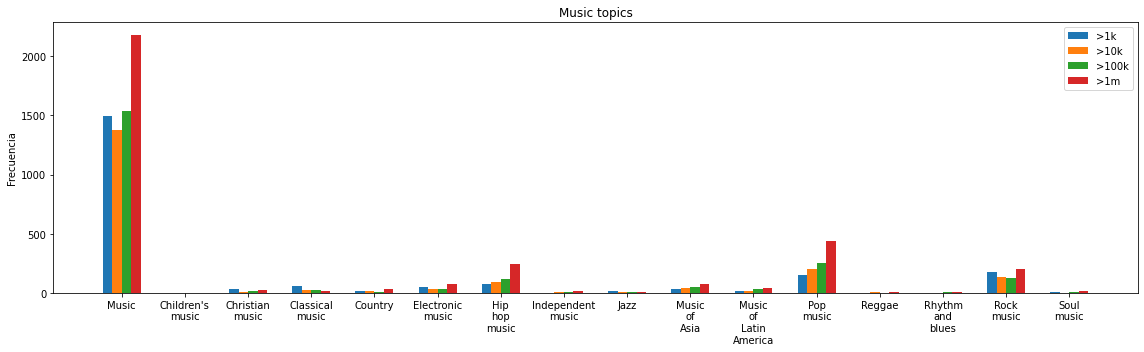

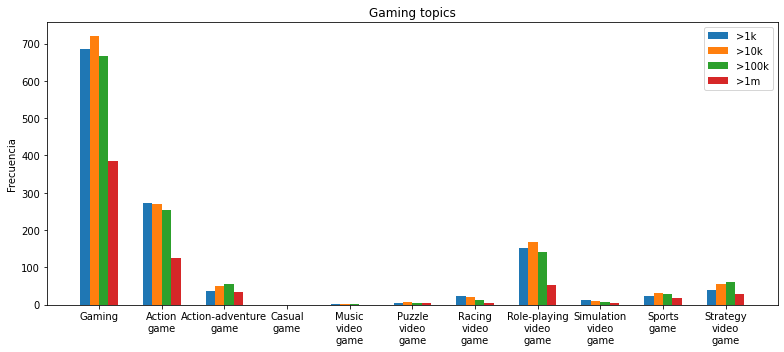

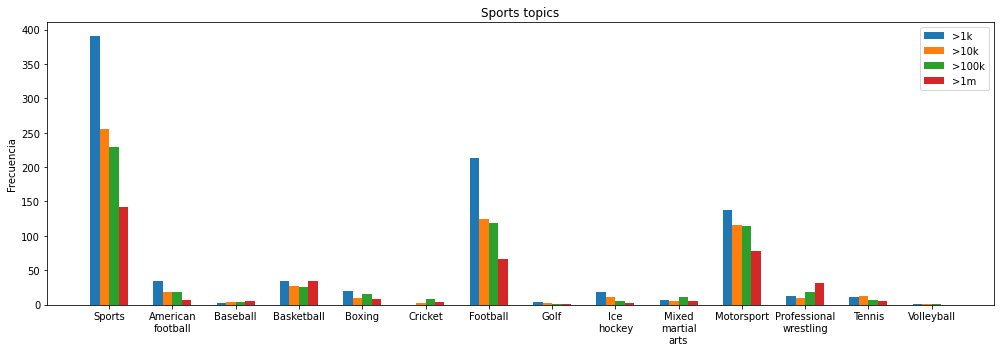

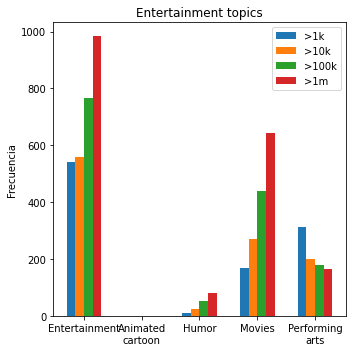

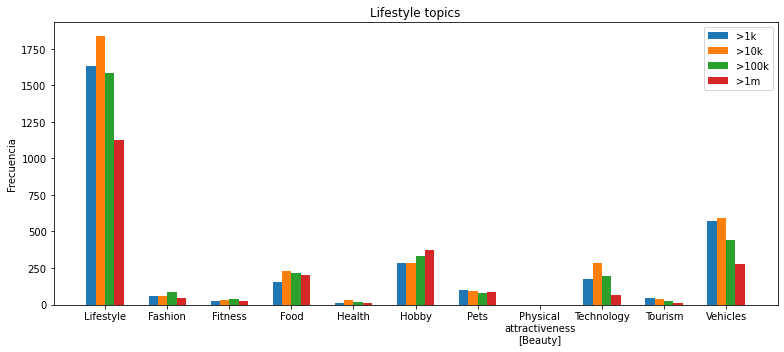

In [80]:
for g in groups:
  get_frequencies(groups[g], g)